# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today you will become Dr Semmelweis. This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [81]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from scipy import stats

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [4]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration

**Challenge**: Check out these two DataFrames ☝️. 
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [5]:
print(f"Yearly Data : {df_yearly.shape}")
print(f"Monthly Data: {df_monthly.shape}")

Yearly Data : (12, 4)
Monthly Data: (98, 3)


In [6]:
print(f"First Year: {df_monthly.date.dt.year.min()}")
print(f"Last Year : {df_monthly.date.dt.year.max()}")

First Year: 1841
Last Year : 1849


In [7]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


### Check for Nan Values and Duplicates

In [8]:
# There are no NaN values in either dataframe
# There are also no duplicated values in either dataframe

### Descriptive Statistics

In [9]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


### Percentage of Women Dying in Childbirth

**Challenge**: How dangerous was childbirth in the 1840s in Vienna? 

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [10]:
print(f'{(df_yearly.deaths.sum() / df_yearly.births.sum()) * 100:.2f}%')

7.08%


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

**Challenge**: Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes. It should look something like this:

<img src=https://i.imgur.com/F9DOJxx.png width=700>

* Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively. 
* Do you notice anything in the late 1840s?

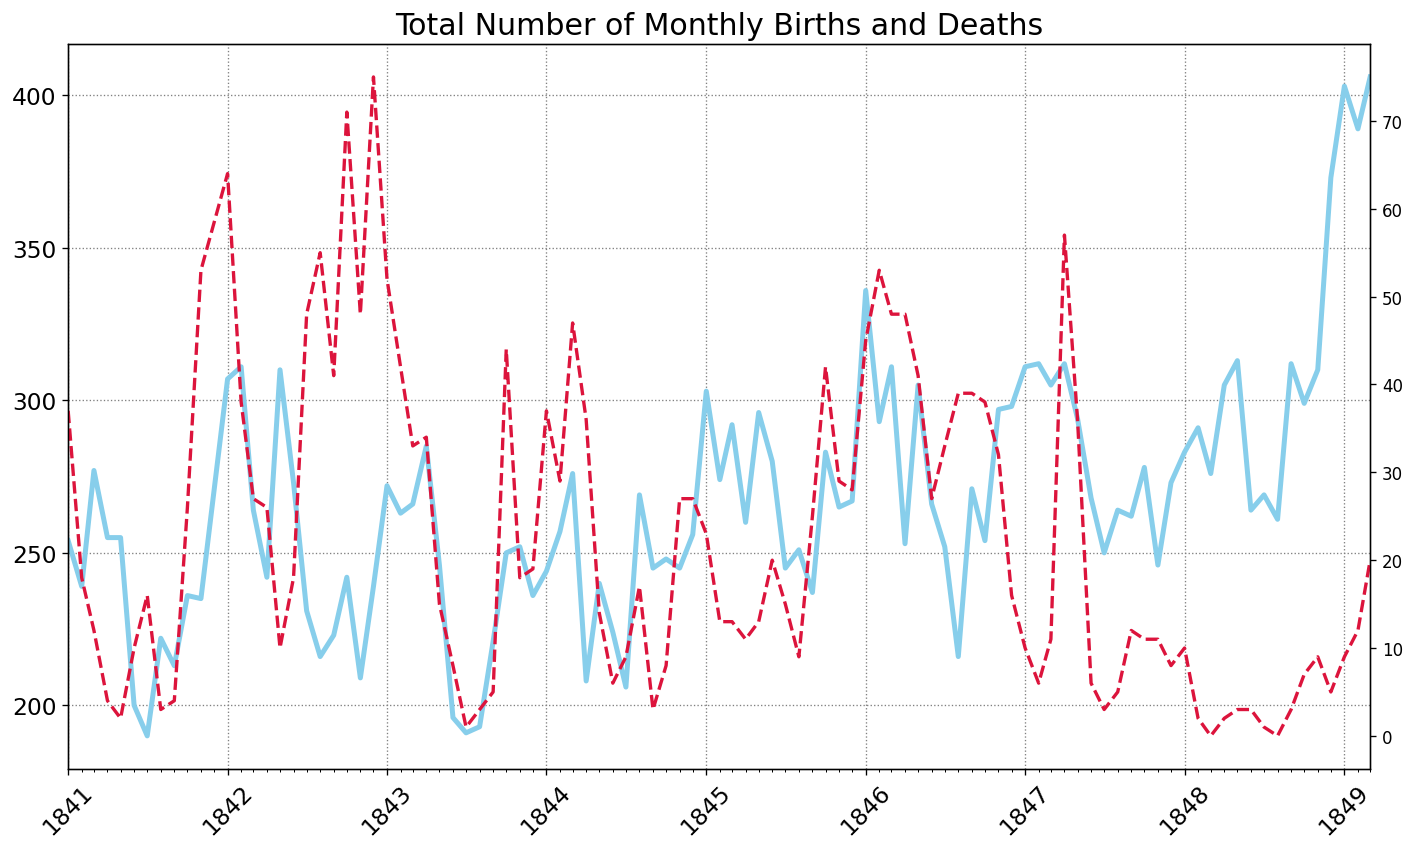

In [11]:
plt.figure(figsize=(14,8), dpi=120)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

plt.title('Total Number of Monthly Births and Deaths', fontsize=18)

# get coordinates and make twin y-axes
ax1 = plt.gca()
ax2 = ax1.twinx()

# set locators. remember that when setting locators, you have to
# specify what axis you need it for. in this case, we need it for
# the x-axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)

# for setting limits, it's not set in the plot method, but for the
# actual properties of the Axes object itself. as well as the grid.
ax1.set_xlim(left=df_monthly.date.min(), right=df_monthly.date.max())
ax1.grid(color='grey', linestyle='dotted')

ax1.plot(
    df_monthly.date, df_monthly.births,
    color='skyblue',
    linewidth=3
)

ax2.plot(
    df_monthly.date, df_monthly.deaths,
    color='crimson',
    linewidth=2,
    linestyle='dashed'
)

plt.show()

# The Yearly Data Split by Clinic

Now let's look at the annual data instead. 

**Challenge**: Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital. 
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time? 
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [12]:
# construct annual data by category
annual_data_clinic1 = px.line(
    data_frame=df_yearly,
    x='year',
    y='births',
    color='clinic',
    title='Total Yearly Births by Clinic'
)

annual_data_clinic1.show()

In [13]:
# construct annual data by category
annual_data_clinic2 = px.line(
    data_frame=df_yearly,
    x='year',
    y='deaths',
    color='clinic',
    title='Total Yearly Births by Clinic'
)

annual_data_clinic2.show()

### Calculate the Proportion of Deaths at Each Clinic

**Challenge**: Calculate the proportion of maternal deaths per clinic. That way we can compare like with like. 
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths". 
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [14]:
df_yearly['pct_deaths'] = df_yearly.deaths.divide(df_yearly.births).multiply(100)

df_yearly.describe()

,year,births,deaths,pct_deaths
count,12.00,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33,6.95
std,1.78,449.08,145.38,4.05
min,"1,841.00","2,442.00",66.00,2.04
25%,"1,842.00","2,901.75",100.25,3.34
50%,"1,843.50","3,108.50",219.50,7.25
75%,"1,845.00","3,338.25",263.50,8.42
max,"1,846.00","4,010.00",518.00,15.76


### Plotting the Proportion of Yearly Deaths by Clinic

In [15]:
# construct death rate data from annual data
annual_drate_clinic1 = px.line(
    data_frame=df_yearly,
    x='year',
    y='pct_deaths',
    color='clinic',
    title='Death Rate per Year'
)

annual_drate_clinic1.show()

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [16]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**: 
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [17]:
# make new column about proportion of deaths to births
df_monthly['pct_deaths'] = df_monthly.deaths.divide(df_monthly.births).multiply(100)

In [18]:
# create two subsets before and after the start of handwashing practice
monthly_before = df_monthly[df_monthly.date < handwashing_start]
monthly_after = df_monthly[df_monthly.date >= handwashing_start]

### Calculate a Rolling Average of the Death Rate

**Challenge**: Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

*Hint*: You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.

In [19]:
# set date as the index, and then get the rolling mean
rolling_mbefore = monthly_before.set_index('date').rolling(window=6).mean()

### Highlighting Subsections of a Line Chart

**Challenge**: Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<img src=https://i.imgur.com/X6TQe0R.png width=500>

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line. 
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers. 
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

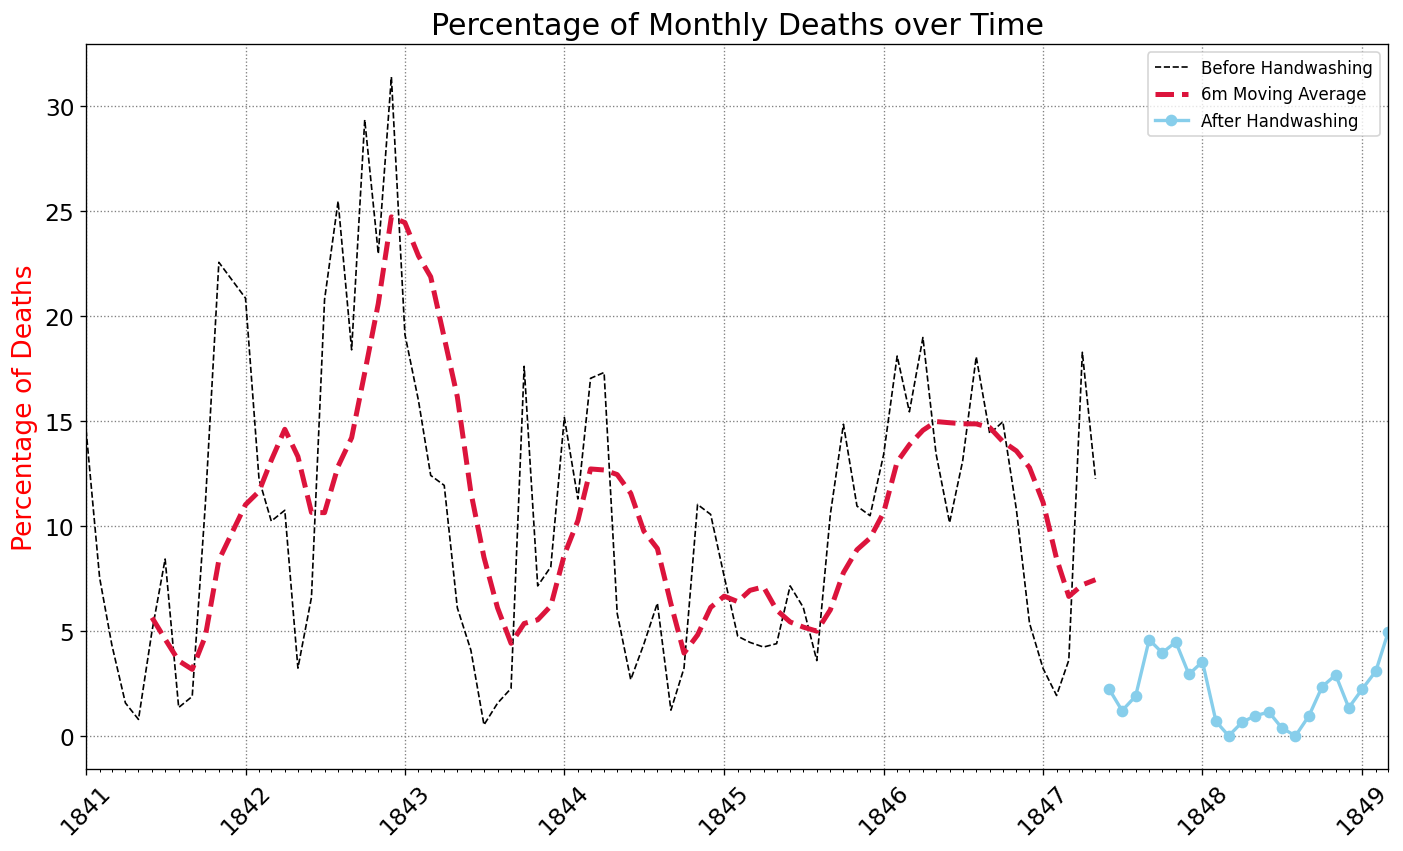

In [20]:
plt.figure(figsize=(14,8), dpi=120)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.ylabel('Percentage of Deaths', color='red', fontsize=16)

plt.title('Percentage of Monthly Deaths over Time', fontsize=18)

# get coordinates
ax1 = plt.gca()

# set locators. remember that when setting locators, you have to
# specify what axis you need it for. in this case, we need it for
# the x-axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)

# for setting limits, it's not set in the plot method, but for the
# actual properties of the Axes object itself. as well as the grid.
ax1.set_xlim(left=df_monthly.date.min(), right=df_monthly.date.max())
ax1.grid(color='grey', linestyle='dotted')

ax1.plot(
    monthly_before.date, monthly_before.pct_deaths,
    color='black',
    linewidth=1,
    linestyle='dashed'
)

ax1.plot(
    rolling_mbefore.index, rolling_mbefore.pct_deaths,
    color='crimson',
    linewidth=3,
    linestyle='dashed'
)

ax1.plot(
    monthly_after.date, monthly_after.pct_deaths,
    color='skyblue',
    linewidth=2,
    marker='o'
)

ax1.legend(['Before Handwashing', '6m Moving Average', 'After Handwashing'])

plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

**Challenge**:
* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

In [21]:
print(f'Monthly Death Rate BEFORE: {monthly_before.pct_deaths.mean():.2f}%')
print(f'Monthly Death Rate AFTER: {monthly_after.pct_deaths.mean():.2f}%')

print(f'Monthly Death Rate difference: {monthly_before.pct_deaths.mean() - monthly_after.pct_deaths.mean():.2f}%')

Monthly Death Rate BEFORE: 10.50%
Monthly Death Rate AFTER: 2.11%
Monthly Death Rate difference: 8.40%


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Challenge**: 
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing. 
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [33]:
# make a numpy array with the given dates as the condition
test = np.where(df_monthly.date >= handwashing_start, 'After', 'Before')

# construct new column
df_monthly['handwash_start'] = test

In [36]:
drate_change_fig = px.box(
    data_frame=df_monthly,
    x='handwash_start',
    y='pct_deaths',
    color='handwash_start',
    title='Death Rates Before and After Handwashing'
)

drate_change_fig.update_layout(
    xaxis_title='Handwash Start',
    yaxis_title='Death Rate'
)


drate_change_fig.show()

### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Challenge**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths. 

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable. 
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter. 

In [67]:
# The reason I struggled with the histogram part is not because it was
# relatively difficult, but because I didn't have any idea what a histogram
# was even supposed to display. Seeing Angela's solution image, my answer
# was different to hers. Ultimately, I had to look at her solution in order
# for me to understand what histograms really do.

# So, looking at the chart, it looks like what Angela wanted me to visualize
# was the count of each death rate within any given time period (determined
# by the number of bins in the kwargs), and how it reflects to the box data
# above with the marginal kwarg.

# Looking how histograms can be viewed alongside other graphs, I guess I just
# whined about today's challenge. I gotta step up to the next and figure it out
# myself. It wasn't about how histograms should look, it was just about how I
# understood the problem. 悪なかった！
drate_hstgrm = px.histogram(
    data_frame=df_monthly,
    x='pct_deaths',
    # y='pct_deaths',
    opacity=0.6,
    nbins=50,
    color='handwash_start',
    histnorm='percent',
    barmode='overlay',
    marginal='box'
)

drate_hstgrm.update_layout(
    bargap=0.1,
    xaxis_title='Death Rate',
    yaxis_title='Count',
    title='Proportion of Monthly Deaths'
)

drate_hstgrm.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after. 

* Use the `shade` parameter to give your two distributions different colours. 
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem. 


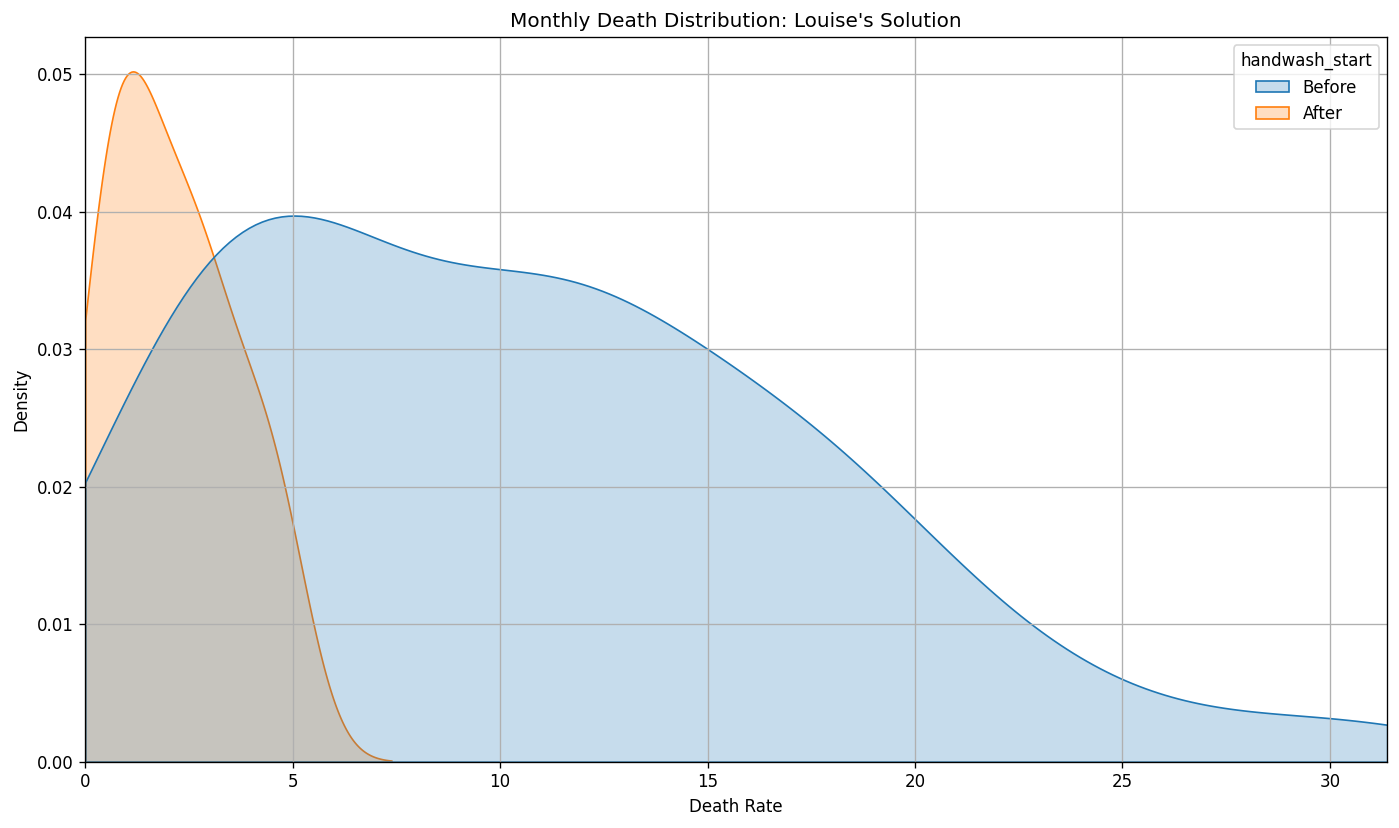

In [79]:
# Remember: if it's distribution of data we're looking for, we're talking
# about the sum of the data within each subset. Just a quick tip for data
# science-y stuff. Better keep up by studying statistics, kid! 頑張ろう!

plt.figure(figsize=(14,8), dpi=120)

# actual axes for graph
drate_distribution = sns.kdeplot(
    x=df_monthly.pct_deaths,
    hue=df_monthly.handwash_start,
    shade=True,
    clip=(0, df_monthly.pct_deaths.max())
)

# apply grid to seaborn plot
plt.grid(
    linestyle='-'
)

# plt config
plt.xlabel('Death Rate')
plt.xlim(0, df_monthly.pct_deaths.max())
plt.title("Monthly Death Distribution: Louise's Solution")

plt.show()

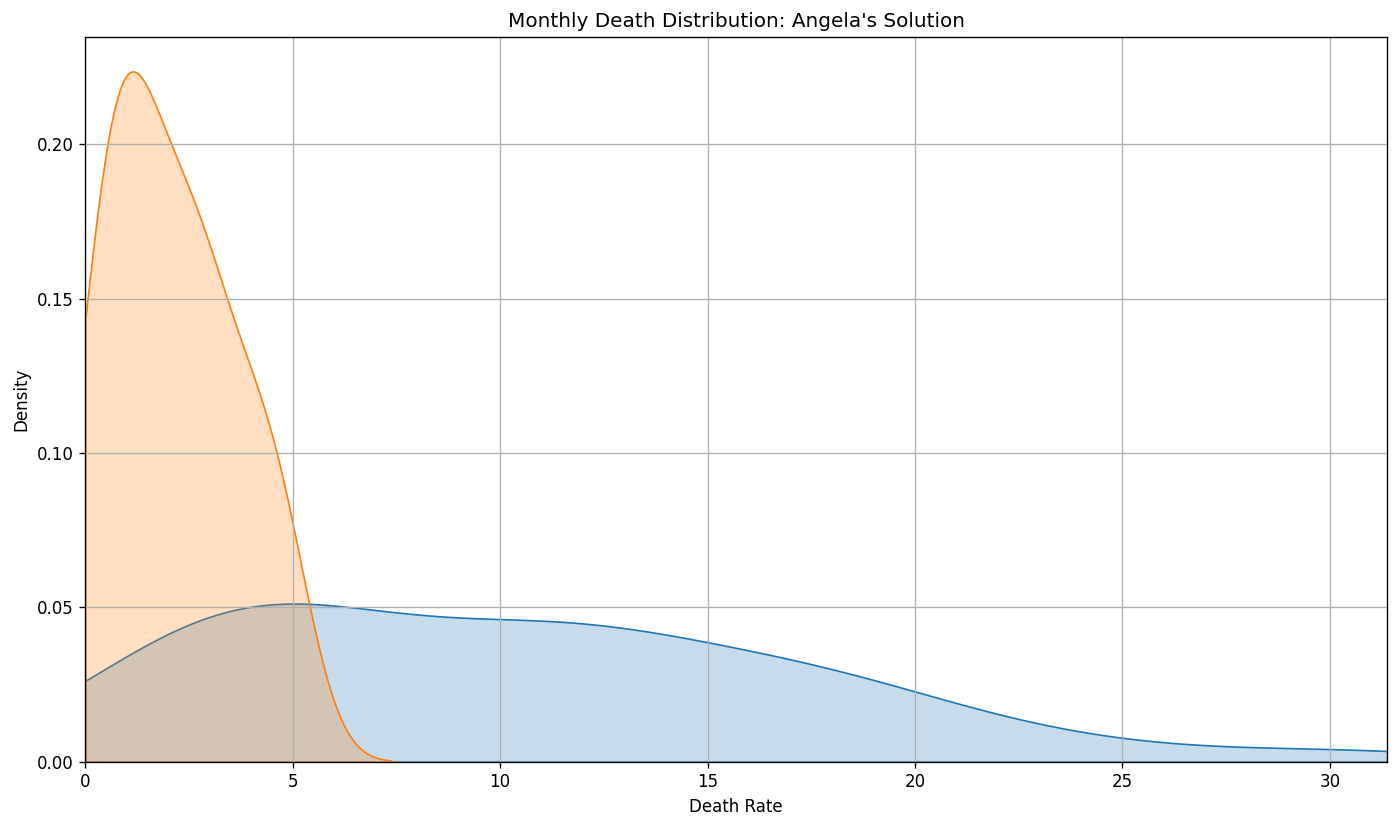

In [80]:
# Remember: if it's distribution of data we're looking for, we're talking
# about the sum of the data within each subset. Just a quick tip for data
# science-y stuff. Better keep up by studying statistics, kid! 頑張ろう!

plt.figure(figsize=(14,8), dpi=120)

# actual axes for graph
sns.kdeplot(
    monthly_before.pct_deaths,
    shade=True,
    clip=(0, df_monthly.pct_deaths.max())
)

sns.kdeplot(
    monthly_after.pct_deaths,
    shade=True,
    clip=(0, df_monthly.pct_deaths.max())
)

# apply grid to seaborn plot
plt.grid(
    linestyle='-'
)

# plt config
plt.xlabel('Death Rate')
plt.xlim(0, df_monthly.pct_deaths.max())
plt.title("Monthly Death Distribution: Angela's Solution")

plt.show()

### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance. 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level? 



In [84]:
stats.ttest_ind(monthly_before.pct_deaths, monthly_after.deaths)

Ttest_indResult(statistic=2.508184840916101, pvalue=0.013812414300921791)

What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>